In [3]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])  # Drop rows with missing values


In [5]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [6]:
df = pd.get_dummies(df, drop_first=True)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Fix TotalCharges (convert to numeric, drop missing)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# 3. Encode Yes/No columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 4. One-Hot Encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# 5. Separate Features & Target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(5625, 7061) (1407, 7061)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model = LogisticRegression(max_iter=8000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_pred_log_proba = log_model.predict_proba(X_test)[:,1]

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log_proba))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC: 0.8320840084691802


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:,1]

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf_proba))



Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

ROC AUC: 0.8182866475816764


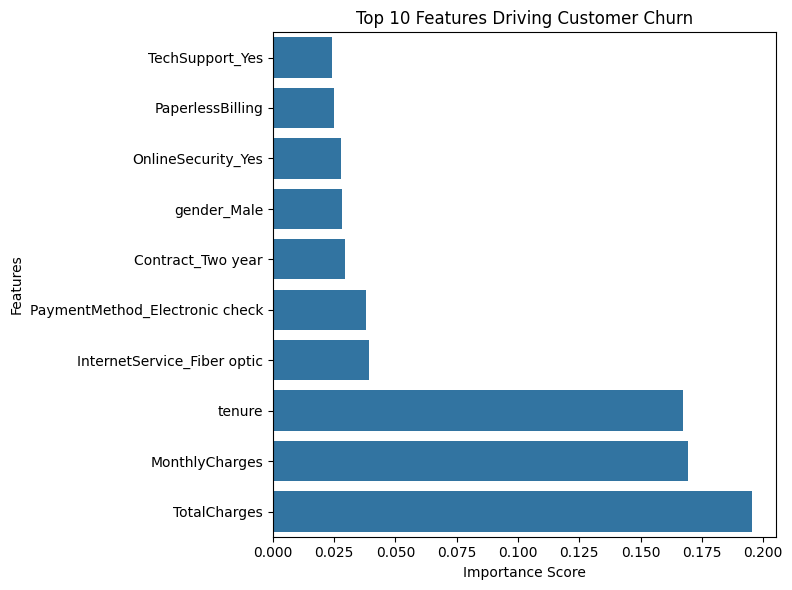

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[-10:]  # Top 10 features

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance[indices], y=X_train.columns[indices],legend=False)
plt.title("Top 10 Features Driving Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


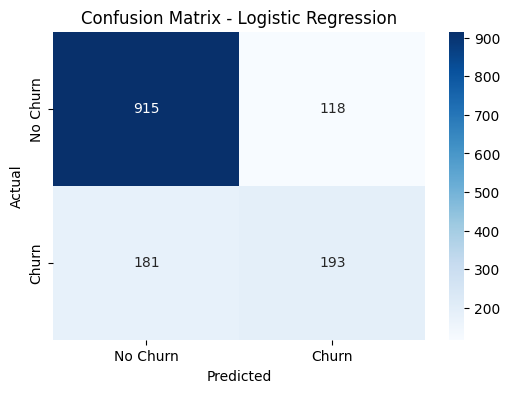

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn','Churn'],
            yticklabels=['No Churn','Churn'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


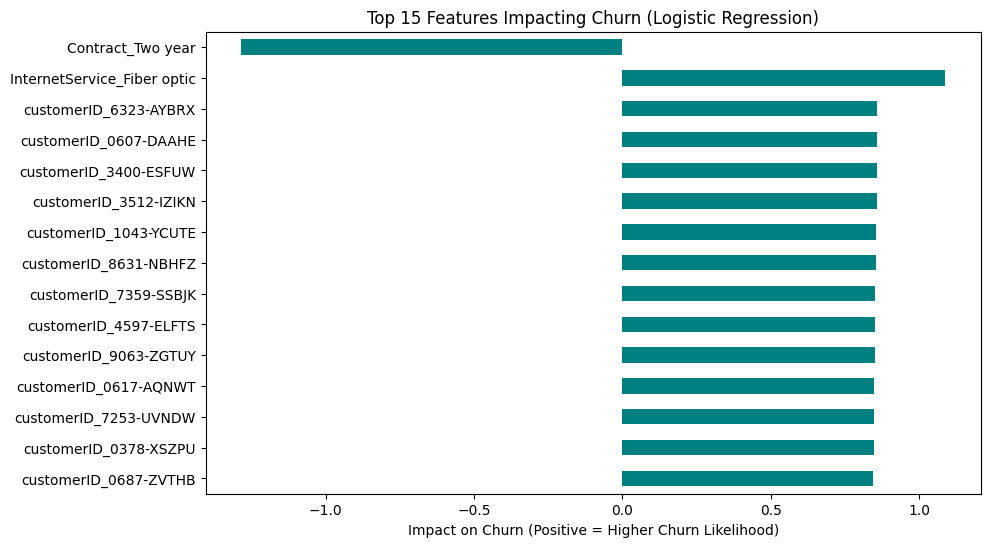

In [36]:
# Sort by absolute value and take top 15
top_coeffs = coeffs.abs().sort_values(ascending=False).head(15)
top_coeffs = coeffs[top_coeffs.index]  # keep original sign

plt.figure(figsize=(10,6))
top_coeffs.plot(kind='barh', color='teal')
plt.title("Top 15 Features Impacting Churn (Logistic Regression)")
plt.xlabel("Impact on Churn (Positive = Higher Churn Likelihood)")
plt.gca().invert_yaxis()
plt.show()


In [37]:
import pandas as pd

# Load fresh dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Fix data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode Yes/No as 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Drop customerID BEFORE one-hot encoding
df.drop('customerID', axis=1, inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate features & target
X = df.drop('Churn', axis=1)
y = df['Churn']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC: 0.8319235288940887


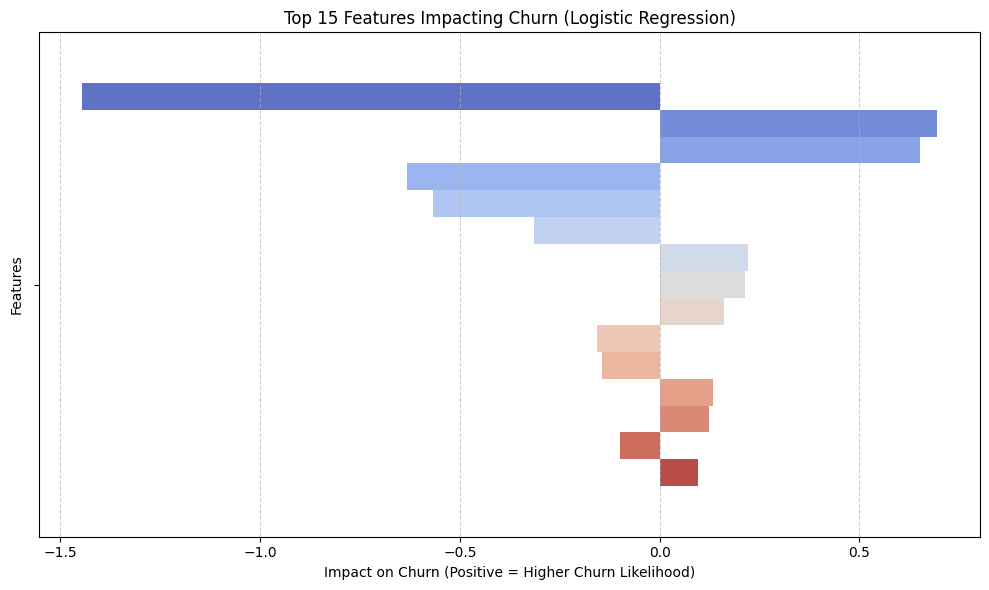

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from model coefficients
coefficients = log_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for easy sorting
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance[:15],
    hue=feature_importance[:15].index,
    palette="coolwarm",
    legend=False
)
plt.title("Top 15 Features Impacting Churn (Logistic Regression)")
plt.xlabel("Impact on Churn (Positive = Higher Churn Likelihood)")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

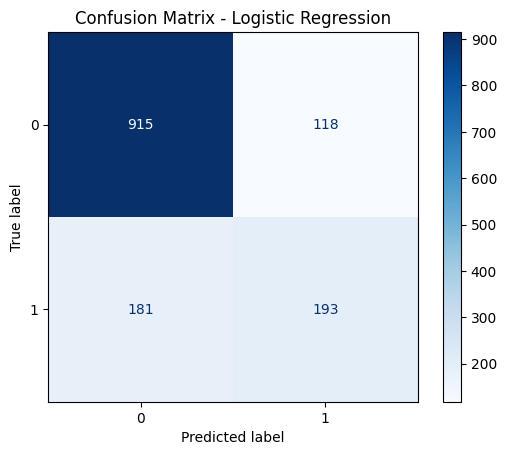

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
